<div style="text-align: center;">
<h2>2221 ECE 2195 SEC1305 SPECIAL TOPICS: COMPUTERS</h2>
<h1 style="font-size: 250%;">Assignment 1</h1>
<h3>Total points: 100 </h3>
</div>

In [1]:
# Please type your information inside the double quotes
firstName = "Avery"
lastName = "Peiffer"
pittID = "aep65"

In [2]:
# Libraries 
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets, preprocessing

### Problem 1. K-nearest neighbors (10 pts) 

In this problem, do not use build-in  functions for classification (i.e. do not use sklearn.neighbors). You will be required to do the calculations and make the predictions based on your understanding of how the technique works. You can use pen and paper to do the calculations (and upload image of your solutions) or write the code of detailed calculations and prediction.

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this dataset to make a prediction for Y when X1 = -1, X2 = 1, and X3 = 2 using K-nearest neighbors.

|Obs.|X1|X2|X3|Y|
|:-|:-:|:-:|:-:|:-:|
|1|0 |3|0|Green|
|2|2 |0|0|Green|
|3|0 |1|3|Green|
|4|0 |1|2|Red|
|5|-1|0|1|Red|
|6|1 |1|1|Green|

**Problem 1-1 (3 pts)** Compute the Euclidean distance between each observation and the test point. Your output should be a vector, where each number in the vector represents the distance between the observations and the test point. You can also show your results in a table, which may looks like this (t-point is the test point):

|Obs.|1|2|3|4|5|6|t-point|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1||||||||
|2||||||||
|3||||||||
|4||||||||
|5||||||||
|6||||||||

**Answer here**


|Obs.|1|2|3|4|5|6|t-point|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|0|3.61|3.61|2.83|3.32|2.45|3|
|2|3.61|0|3.74|3|3.16|1.73|3.74|
|3|3.61|3.74|0|1|2.45|2.24|1.41|
|4|2.83|3|1|0|1.73|1.41|1|
|5|3.32|3.16|2.45|1.73|0|2.23|1.41|
|6|2.45|1.73|2.24|1.41|2.23|0|2.23|

**Problem 1-2 (2 pts)** What is the prediction with K = 1? 

4 is the nearest neighbor, so the prediction is red.


**Problem 1-3 (3 pts)** What is the prediction with K = 3? And K = 5? 

* K = 3: 3, 4, and 5 are the 3 nearest neighbors, and the votes are [Green, Red, Red]. Overall, the prediction is Red.
* K = 5: 1, 3, 4, 5, and 6 are the 5 nearest neighbors, and the votes are [Green, Green, Red, Red, Green]. Overall, the prediction is Green.


**Problem 1-4 (2 pts)**  For KNN classification, discuss the impact of choosing the parameter K on the model performance. Highlight the different trade-offs.

**Answer here**

The choice of k has a high impact on the model's performance. A lower value of k results in a more complex model, with higher variance and lower bias. Models with lower values of k are more likely to be overfitting because they are not capturing the larger trends within the data. Similarly, a higher value of k can result in a more simple model, with lower variance and higher bias. Such a model is more likely to be underfitting because it is not capturing the underlying variability in the data.

### Problem 2. Linear regression calculations of coefficients and $R^2$ (15 pts)

- You should not use built-in functions for linear regression in this question's parts (2-1) and (2-2). Do the calculations manually or explicitly by code.
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

**Problem 2-1 (5 pts)** Find the least squared fit of a linear regression model using the following traning data. Coefficients are obtained using the formulas: 
\begin{array} \\
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}, \\ \\
    \hat{\beta}_1 = \frac{\sum_{i=1}^n y_i x_i - \bar{y}\sum_{i=1}^n x_i}{\sum_{i=1}^n x^2 - \bar{x}\sum_{i=1}^n x_i} \\ \\
    \text{where }\bar{x} = \frac{\sum_{i=1}^y x_i}{n} \text{ and } \bar{y} = \frac{\sum_{i=1}^y y_i}{n} \\
\end{array}

|Smoke index(x)|Lung cancer mortality index(y)|
|:-:|:-:|
|127|115|
|121|128|
|94|128|
|126|156|
|102|101|
|111|128|
|95|115|
|89|105|
|101|87|

**Answer here**

(Calculations attached)

B_0 = 37.73

B_1 = 0.749

**Problem 2-2 (6 pts)** Given the test data below, compute the TSS, RSS and the R-squared metric of the fitted model.

|Xi|Yi|
|:-:|:-:|
|90|103|
|106|131|
|105|85|
|115|99|
|113|144|

**Answer here**

(Calculations attached)

RSS = 2267.411

TSS = 2363.2

R^2 = 0.0405

**Problem 2-3 (4 pts)** Check your calculations by finding the coefficients and the $R^2$ score using scikit-learn library (from sklearn.linear_model import LinearRegression).

In [3]:
X_train = np.array([127, 121, 94, 126, 102, 111, 95, 89, 101])
Y_train = np.array([115, 128, 128, 156, 101, 128, 115, 105, 87])
X_test = np.array([90, 106, 105, 115, 113])
Y_test = np.array([103, 131, 85, 99, 144])

linreg = LinearRegression().fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))
print(f'B_1: {linreg.coef_}.')
print(f'B_0: {linreg.intercept_}.')

pred = linreg.predict(X_test.reshape(-1, 1))
print('R^2 score: %.4f.' % r2_score(Y_test, pred))

B_1: [[0.7500998]].
B_0: [37.6003992].
R^2 score: 0.0406.


### Problem 3. Linear Regression Optimization with Gradient Descent (15 pts)

In this question, you will create a synthetic dataset, then use gradient descent to find the coefficients' estimates. We will see how the RSS changes with iterations of the gradient descent.

**Problem 3-1 (2 pts)** Create a label $y$, which is related to a feature $X$, such that $y=10 + 5 X + \epsilon$. $\epsilon$ is a Gaussian noise (normal distribution) with mean 0 and unit variance. X is generated from a uniform distribution as given below. The number of observations to be generated is 100.

In [4]:
NumberObservations = 100
minVal = 1
maxVal = 20
X = np.random.uniform(minVal,maxVal,(NumberObservations,1))

Y = np.zeros(100)
for i in range(0, NumberObservations):
    error = np.random.normal()
    Y[i] = 10 + 5*X[i] + error

**Problem 3-2 (10 pts)** Now assume you do not know the actual relationship between X and y, use the generated noisy data and find the coefficients of a linear regression model obtained by gradient descent. Do not use any built-in functions for gradient descent. Write the code based on your understanding of the algorithm. The cost function is the RSS, set the number of iterations to 10000 and the learning rate to 0.00001.
1. Print the estimated coefficients of the model obtained using gradient descent. (4 pts)
2. Record the RSS in each iteration of the gradient descent and plot the last 6000 values of the RSS. Comment on figure. (3 pts)
3. Comment on how close the obtained coefficients are from the actual ones. (3 pts)

In [5]:
def gradient_descent(X, Y):
    n = 10000
    lr = 0.00001

    y_bar = np.mean(Y)
    x_bar = np.mean(X)

    # Initialize values for B0 and B1
    rand_multiplier = 30
    b_0 = rand_multiplier * np.random.rand()
    b_1 = rand_multiplier * np.random.rand()

    rss_its = []
    rss_arr = []

    for i in range(0, n):
        b_0_sum = 0
        b_1_sum = 0
        running_rss = 0

        for j in range(0, len(X)):
            inside_deriv = b_0 + b_1*X[j] - Y[j]
            b_0_sum += inside_deriv
            b_1_sum += X[j]*inside_deriv
            running_rss += inside_deriv ** 2

        if i > n - 6000:
            rss_its.append(i)
            rss_arr.append(running_rss)

        deriv_b0 = 2 * b_0_sum
        deriv_b1 = 2 * b_1_sum

        b_0 = b_0 - lr * deriv_b0
        b_1 = b_1 - lr * deriv_b1

    print(f'B_0 is estimated to be: {b_0}.')
    print(f'B_1 is estimated to be: {b_1}.')

    plt.scatter(rss_its, rss_arr)
    plt.xlabel('Gradient descent iteration')
    plt.ylabel('RSS value')
    plt.title('RSS values from 4000-10000 iterations of gradient descent')
    plt.show()

B_0 is estimated to be: [10.1789402].
B_1 is estimated to be: [5.00138832].


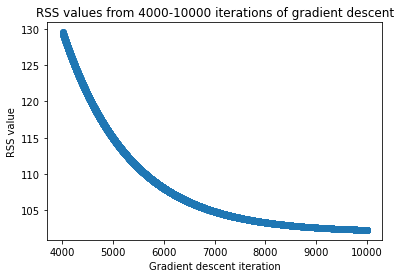

In [6]:
gradient_descent(X, Y)

**Problem 3-3 (3 pts)** Please repeat P3-1 and P3-2 but increase the standard deviation of the error to 100. Comment on the output coefficient estimates.

B_0 is estimated to be: [-4.31500956].
B_1 is estimated to be: [6.26863537].


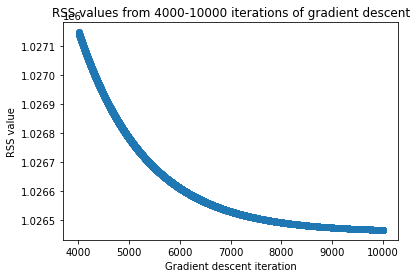

In [7]:
Y = np.zeros(100)
for i in range(0, NumberObservations):
    error = np.random.normal(scale=100)
    Y[i] = 10 + 5*X[i] + error
    
gradient_descent(X, Y)

**Your comment on the output coefficient estimates here**


The increased variance in the error has made it more difficult to estimate the true coefficients. It seems that the intercept term is affected more than the slope term, which makes sense as well. The increased variance should make it harder to estimate the start of the line, but the general trend of the line should remain somewhat similar even with increased variance.

### Problem 4. This question involves the use of multiple linear regression on the Boston dataset (33 pts)

In this part, you are supposed to download and analyze **"Boston House Prices"** dataset. (Using "from sklearn.datasets import load_boston" to import dataset)

- Whole dataset contains 14 attributes (13 numeric/categorical predictive and 1 target value)
- The target value is MEDV, which means the median value of owner-occupied homes in $1000's

Use a code below to load the dataset: 

In [8]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Use the code below to print and read the description of the dataset then answer the following questions. 


In [9]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Problem 4-1 (5 pts)** Generate descriptive statistics using DataFrame. (Hint: use "DataFrame.describe" method)

Follow two steps to answer questions:

- Create a DataFrame using "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

**Please answer the following questions:** 

1. Which feature has the lowest range (minimum and maximum value)?

2. Which feature has the highest mean?  

3. Which feature has a highest variance? 

In [10]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Your answer here**
- lowest_range = NOX (0.385 to 0.871)
- highest_mean = TAX (408.24)
- highest_variance = TAX (168.537^2 = 28404.72)

**Problem 4-2 (5 pts)** Feature Scaling

**Please answer the following questions:**

1. From the information above, do you recommend **feature scaling** ? Please explain.  

2. What is a difference between MinMaxScaler and StandardScaler? 

**Your answer here**

Yes, feature scaling would be useful for this dataset. There is a very wide range of values in the data that could lead to strange results when calculating Euclidean distance. The StandardScaler scales the values such that the resulting distribution has mean = 0 and unit variance. The MinMaxScaler will perform a more linear scaling, instead going from 0 to 1.

**Problem 4-3 (6 pts)** Calculate and report **correlations** between variables 

Follow the steps below to answer questions:

- Add target to the DataFrame.

- Print the correlation matrix that shows the correlation between each pair of variables in the DataFrame.

- Plot a correlation matrix (heatmap). You may would like to check: https://seaborn.pydata.org/generated/seaborn.heatmap.html

**Please answer the following questions:**

1. What is a difference between positive and negative numbers on the correlation table? Please explain.
2. What is the feature that is the most correlated with the target? Do you think it is the most or the least helpful features in predicting the target class? Please explain.
3. What is the correlation between the feature RM and the LSTAT?
4. What does this value of correlation indicate?

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

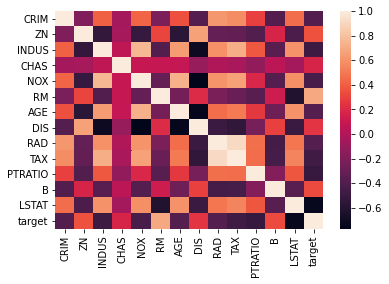

In [11]:
data['target'] = dataset.target
corr = data.corr()
print(corr)

ax = sns.heatmap(corr)

**Your answer here**

1. The positive numbers in the correlation table represent features that, when increased, lead to a (non-trivial) increase in the target. Similarly, negative numbers in the correlation table represent features that, when decreased, lead to a (non-trivial) decrease in the target.
2. It looks like LSTAT is the most negatively correlated feature with the target, which seems to represent the percentage of the lower-income population in the neighborhood. It makes sense that this is the feature that has the highest correlation with the target, as lower-income neighborhoods are more likely to have lower-income homes. I think this will have a decent, though not incredible, impact on predicting the target. RM (the average number of rooms per dwelling) seems to be the most positively correlated feature with the target. Again, this makes sense, as homes that have more rooms will tend to cost more. I think this will have more of an impact on predicting the target because it is unlikely that there are many expensive, one-bedroom homes (and similarly, inexpensive six-bedroom homes).
3. -0.613808
4. This value of correlation indicates that RM and LSTAT have a moderately negative relationship; that is, houses with more rooms per dwelling tend to not be in lower-income neighborhoods. The opposite is also true; houses in lower-income neighborhoods tend to have fewer rooms per dwelling.

**Problem 4-4 (6 pts)** Scatter plot 

1. Plot RM versus target variable 
2. Plot TAX versus target variable 
3. Plot LSTAT versus target variable
4. Comment on each of the above plots: please state the relationship observed from the figures: linear, nonlinear, or quadratic, etc.

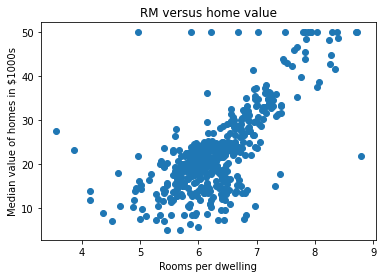

In [12]:
plt.scatter(data.RM, data.target)
plt.xlabel('Rooms per dwelling')
plt.ylabel('Median value of homes in $1000s')
plt.title('RM versus home value')
plt.show()

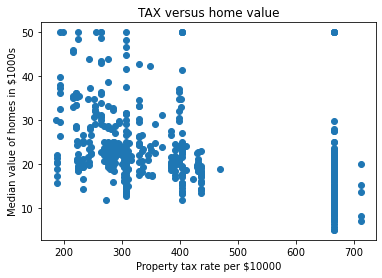

In [13]:
plt.scatter(data.TAX, data.target)
plt.xlabel('Property tax rate per $10000')
plt.ylabel('Median value of homes in $1000s')
plt.title('TAX versus home value')
plt.show()

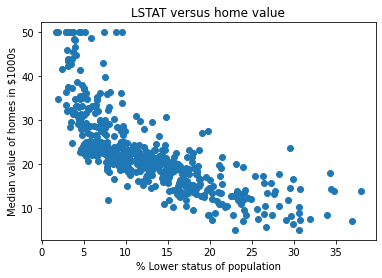

In [14]:
plt.scatter(data.LSTAT, data.target)
plt.xlabel('% Lower status of population')
plt.ylabel('Median value of homes in $1000s')
plt.title('LSTAT versus home value')
plt.show()

**Your answer here**

* RM versus target seems to be a relatively linear relationship, minus some outliers that are likely due to very expensive, possibly historic homes in Boston. 
* TAX versus target seems to be a nonlinear relationship, since the tax rate is not a continuous function and instead falls into discrete bins depending on home value.
* LSTAT versus target seems to be a quadratic relationship, but it is not so pronounced that I am extremely confident in it. A linear relationship could also fit the data decently well. 

**Problem 4-5 (6 pts)**
- Feel free to use scikit-learn (sklearn library) or write your own code to answer the following questions.
- Use train_test_split() with "random_state=0

**Answer the following questions:**
1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric on train and test sets. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^4$ ). Find the R-squared metric. How does R-squared metric differ in the previous models? <br>Comment your observation. 

In [15]:
x = data[['RM', 'LSTAT']]
y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

model = LinearRegression().fit(X_train_t, Y_train)
pred = model.predict(X_test_t)
train_pred = model.predict(X_train_t)

print('Train R^2 score: %.4f' % r2_score(Y_train, train_pred))
print('Test R^2 score: %.4f' % r2_score(Y_test, pred))

Train R^2 score: 0.6598
Test R^2 score: 0.5692


In [16]:
data_copy = data.copy()
data_copy['RM_LSTAT'] = data_copy['RM'] * data_copy['LSTAT']

x = data_copy[['RM', 'LSTAT', 'RM_LSTAT']]
y = data_copy['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

model = LinearRegression().fit(X_train_t, Y_train)
pred = model.predict(X_test_t)
train_pred = model.predict(X_train_t)

print('Train R^2 score: %.4f' % r2_score(Y_train, train_pred))
print('Test R^2 score: %.4f' % r2_score(Y_test, pred))

Train R^2 score: 0.7646
Test R^2 score: 0.6615


In [17]:
data_copy['LSTAT_2'] = data_copy['LSTAT'] ** 2

x = data_copy[['LSTAT', 'LSTAT_2']]
y = data_copy['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

model = LinearRegression().fit(X_train_t, Y_train)
pred = model.predict(X_test_t)
train_pred = model.predict(X_train_t)

print('Train R^2 score: %.4f' % r2_score(Y_train, train_pred))
print('Test R^2 score: %.4f' % r2_score(Y_test, pred))

Train R^2 score: 0.6688
Test R^2 score: 0.5519


In [18]:
data_copy['LSTAT_4'] = data_copy['LSTAT'] ** 4

x = data_copy[['LSTAT', 'LSTAT_2', 'LSTAT_4']]
y = data_copy['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

model = LinearRegression().fit(X_train_t, Y_train)
pred = model.predict(X_test_t)
train_pred = model.predict(X_train_t)

print('Train R^2 score: %.4f' % r2_score(Y_train, train_pred))
print('Test R^2 score: %.4f' % r2_score(Y_test, pred))

Train R^2 score: 0.6801
Test R^2 score: 0.5696


**Your comment here**

It looks like adding the interaction term was useful for improving the test R-squared metric of the model. However, adding polynomial terms for the LSTAT feature seems to not have helped, since it may be overfitting. 

**Problem 4-6 (5 pts)** Fit all features (13 features) in the dataset to a multiple linear regression model, and report p-values of all feature. 

**Answer the following questions:** 

1. What does p-value represent?
2. What are the features that have strong association with the target? What are the ones that seem to have week association? 

In [25]:
model = smf.ols('target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data)
fitting_results = model.fit()

print(fitting_results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.0

**Your answer here**

1. The p-values represent the probability of observing the given feature value if the null hypothesis is true. Essentially it is a measure of association between the features and output, where a low p-value means that there is an association between the two.
2. INDUS (proportion of non-retail business acres per town) and AGE (proportion of owner-occupied units built prior to 1940) seem to be very weakly associated with the target. The rest of the features are moderately or strongly associated with the target, especially NOX (nitric oxides concentration), RM (average number of rooms per dwelling), DIS (weighted distances to five Boston employment centres), RAD (index of accessibility to radial highways), PTRATIO (pupil-teacher ratio by town), and LSTAT (% lower status of the population)

### Problem 5. Regularization (13 pts)

- In this problem, we will use the same dataset as in previous question -- the Boston data set.
- Scale the features with StandardScaler

**Problem 5-1 (3 pts)** Use Ridge regression model with tuning parameter set to 1 (alpha =1). Find the test $R^2$ score and number of non zero coefficients.

**Problem 5-2 (3 pts)**  Use Lasso regression instead of Ridge regression, also set the tuning parameter to 1. Find the test $R^2$ score and number of non zero coefficients.

**Problem 5-3 (3 pts)**  Change the tuning parameter of the Lasso model to a very low value (alpha =0.001). What is the $R^2$ score.

**Problem 5-4 (4 pts)** Comment on your result. 

In [20]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [21]:
ridge = Ridge(alpha=1).fit(X_train_t, Y_train)
print('Test R^2 score: %.4f' % ridge.score(X_test_t, Y_test))
print('Number of non-zero coefficients: %d' % np.sum(ridge.coef_ != 0))

Test R^2 score: 0.6346
Number of non-zero coefficients: 13


In [22]:
lasso = Lasso(alpha=1).fit(X_train_t, Y_train)
print('Test R^2 score: %.4f' % lasso.score(X_test_t, Y_test))
print('Number of non-zero coefficients: %d' % np.sum(lasso.coef_ != 0))

Test R^2 score: 0.5656
Number of non-zero coefficients: 5


In [23]:
lasso = Lasso(alpha=0.0001).fit(X_train_t, Y_train)
print('Test R^2 score: %.4f' % lasso.score(X_test_t, Y_test))
print('Number of non-zero coefficients: %d' % np.sum(lasso.coef_ != 0))

Test R^2 score: 0.6355
Number of non-zero coefficients: 13


**Your comment here**

At very low values of alpha, the lasso regression model becomes very similar to the ridge regression model. This is because it is very difficult to actually force the coefficients to 0 at such a low value of alpha. In effect, none of the coefficients are dropped from the model and it results in the same number of non-zero coefficients. 

### Problem 6. Bayes Decision Boundary (14 pts)

Consider a two-category classification problem with two-dimensional feature vector $X = (x_1, x_2)^t$. The two categories (i.e., classes) are $w_1$ and $w_2$, where

\begin{equation}
P(X|w_1) \sim \mathcal{N}(\mu_1,\,\Sigma_1),
\end{equation}

\begin{equation}
P(X|w_2) \sim \mathcal{N}(\mu_2,\,\Sigma_2).
\end{equation}

Such that: 

$\mu_1=\begin{bmatrix} -1 \\ 1  \end{bmatrix}$

$\Sigma_1 = \begin{bmatrix} 1 & 0 \\0 & 1 \end{bmatrix}$

$\mu_2=\begin{bmatrix} 1 \\ 0  \end{bmatrix}$

$\Sigma_2 = \begin{bmatrix} 2 & 2 \\2 & 3 \end{bmatrix}$

**Problem 6-1 (5 pts)** Calculate the Bayes decision boundary.

**Problem 6-2 (5 pts)** Randomly draw 50 patterns from each of the two class-conditional densities and plot them in the two-dimensional feature space. 

**Problem 6-3 (4 pts)** Draw the decision boundary. Is it linear or not?

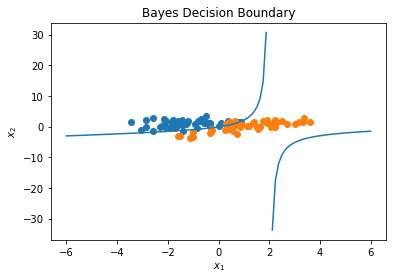

In [24]:
def f(x):
    if x != 2:
        return (0.5*x**2 - 5*x + 0.193) / (2*x - 4)
    
num_points = 50

mean_1 = np.array([-1,1])
cov_1 = np.array([[1,0],[0,1]])
mean_2 = np.array([1,0])
cov_2 = np.array([[2,2],[2,3]])

x1 = np.random.multivariate_normal(mean_1, cov_1, num_points).T
x2 = np.random.multivariate_normal(mean_2, cov_2, num_points).T

x = np.linspace(-6, 6, 100)
y = []

for val in x:
    y.append(f(val))

plt.plot(x, y)
plt.scatter(x1[0], x1[1])
plt.scatter(x2[0], x2[1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Bayes Decision Boundary')
plt.show()

The decision boundary does not look to be linear.

### Submission
Once you completed the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-Assignment1.ipynb</b>, and submit it on Canvas.